# About

Takes a .mat file exported from asy_script and finds the roots using the same initial conditions.

# Library

In [1]:
from __future__ import division, print_function

import os
import numpy as np
from numpy.polynomial.polynomial import polyval
from scipy import optimize
import scipy.io as sio
import matplotlib.pyplot as plt
import math
from math import pi

from lib import *

from IPython.display import clear_output
%matplotlib inline

# Directories

In [2]:
# Data files
name_folder = 'process4'
name_file = 'sol30_gain35_3'

# Directory
dir_main = os.getcwd()
dir_mat = os.path.join(dir_main, 'data', name_folder, name_file)

# Import using Scipy
dict_mat = sio.loadmat(dir_mat)

# Find roots

In [3]:
# Initial conditions
tau0 = dict_mat['tau0']
phi0 = np.reshape(dict_mat['phi0'], -1)
Omega0 = dict_mat['omega0'][0,0]

param = {'g': dict_mat['g'][0,0],
         'gain': dict_mat['gain'][0,0],
         'w0': dict_mat['omega0'][0,0]
        }

root_fun = lambda phi: funlib.Omega_root(phi, tau0, param)

phi1 = np.concatenate((np.array([Omega0]), phi0[1:] - phi0[0]))
root = optimize.root(root_fun, phi1, method='lm')

# Plot results

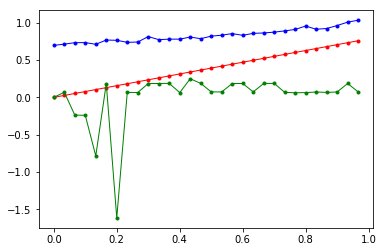

In [4]:
fig, ax = plt.subplots(1,1)

# Figure options
pltopts = {'linestyle': '-',
           'linewidth': 1.0,
           'marker': '.',
          }

asy_inds = np.reshape(dict_mat['inds'], -1)
asy_phases = np.reshape(dict_mat['phi'], -1)
asy_roots = np.concatenate((np.array([phi0[0]]), root.x[1:]))

ax.plot(asy_inds, phi0, color='red', **pltopts)
ax.plot(asy_inds, asy_phases, color='blue', **pltopts)
ax.plot(asy_inds, asy_roots, color='green', **pltopts)

In [5]:
root.success

False

In [7]:
Omega = dict_mat['Omega'][0,0]
phi2 = np.concatenate((np.array([Omega]), asy_phases[1:] - asy_phases[0]))

err = np.sum(root_fun(phi2))
print(err)

0.01993583322499831
